# IE582 FALL24 PROJECT BOGAZICI UNIVERSITY FALL 2024


##### Lea Michels 2024690336
##### Hannes Knieke 2024690333
##### Fatih Akyıldız 2019402162




# 1. INTRODUCTION

### Problem Description:

The objective of this project is to develop a live betting strategy for soccer matches using provided match data, including in-game statistics and odds. The task requires identifying a single optimal time instant during a game to make a prediction about the match outcome—home win, draw, or away win—and decide whether to bet or take no action. Once a decision is made, no further revisions or additional predictions can be made for that match. This mimics real-world betting conditions where future data is inaccessible at the time of decision-making.

Key constraints and goals:

-Single decision per match at a specific time instant.

-Decisions must be based solely on data available up to that time point.

-Avoid forward-seeing by not using future information.

-Performance measures include accuracy (proportion of correct predictions) and return (cumulative profit/loss based on betting odds)

### Summary of Proposed Approach:

Data Preprocessing:

Adjusted minute values by adding 45 minutes for second-half events to align with full match time and it is hard for models to capture halftime feature with 1st-half and 2nd-half values.

Filled missing values using forward-fill for columns representing cumulative match stats and zeros where applicable.

Feature Manipulation:

- We normalized the percantage columns and bookmakers odds(previously done in hw2) 

- Also identified the cumulative yet continous features and normalize it also to get it learnt better by models we used.

- finally created a dataFrame with only relecant columns that we will use for prediction purposes.



Model Training:

-Three models were used: XGBoost, GLM (L1-regularized), and Random Forest.

-Hyperparameter tuning was performed using GridSearchCV to optimize accuracy and find optimal parameters for each model as we discussed in lectures.

-After training models with parameters tuned and cross-validated. We proceed to brainstorm on how to construct a algorithm.

Live Betting Strategy:

-For each match, iterated over available minutes (using the available minute up to that minute) and made a prediction when confidence exceeded a threshold.

-If no confident prediction was made during the match, the decision was “no action”.

-Odds from the original data were used to compute cumulative returns for bets placed.

-Introduced a cutoff minute (e.g., 90th minute) to experiment how constraining last-minute decisions affect our strategy.

-Incremented confidence threshold slightly as time progressed to favor early predictions where odds are relatively more profitable.

### Descriptive Analysis of the Match Data

Match events:
goals, corners, and successful passes..... for both home and away teams.
Metrics are cumulative.

Team Performance stats:
ball possession %, accurate crosses, shots on target, etc., indicate the performance of each team during the match.

Betting Odds:
The dataset includes live odds for three outcomes:
1 (Home Win)
2 (Away Win)
X (Draw)

we observed until a event occur or any team performance stat initialize values of stats come up to be missing making it suitable for forward filling.





# 2. Related Literature

Our main workflow was built regarding to material we covered in lectures. We tried to imply techniques delivered in class material. Besides that we also search relevant studies to finalize our decision and workflow.

- "Improving Sports Outcome Prediction Process Using Integrating Adaptive Weighted Features and Machine Learning Techniques" by Chi-Jie Lu, Tian-Shyug Lee, Chien-Chih Wang, Wei-Jen Chen[1] proposed Random Forests and XGBoost are ensemble learning methods that have been effectively applied in sports outcome predictions. For instance, a study on NBA game outcome prediction integrated data mining techniques, including XGBoost, to forecast game scores, demonstrating the model's efficacy in handling complex, high-dimensional data. Also we saw tgat penalized regression models, such as Lasso (L1 regularization), are employed to manage multicollinearity and enhance predictive accuracy by imposing penalties on the size of coefficients. This technique is particularly useful in sports betting models where numerous correlated predictors are present it says.

- "A Systematic Review of Machine Learning in Sports Betting: Techniques, Challenges, and Future Directions" by René Manassé Galekwa, Jean Marie Tshimula, Etienne Gael Tajeuna, Kyamakya Kyandoghere[2] showed us feature normalization is a critical preprocessing step in machine learning models to ensure that each feature contributes equally to the model's performance. In sports betting, where data can vary widely in scale, normalization facilitates the convergence of algorithms and improves predictive accuracy. It highlights the importance of data preprocessing, including normalization, in developing effective predictive models. 

# 3. APPROACH

Our initial priority was to create a roadmap. After reviewing the topics covered in lectures and relevant research papers, we outlined the following roadmap for our approach:

- Review the data
- Manipulate the data
- Decide on features useful for prediction
- Extract features
- Propose a model and perform hyperparameter tuning with cross-validation for training and tuning purposes
- Propose a live betting algorithm to decide whether to place a bet or not
- Evaluate our betting strategy within the scope of the three proposed models

#### Preprocessing and Feature Manipulation

We began manipulating the data by sorting it based on fixture_id, halftime, minute, and second values. Upon further examination, we observed that the features were cumulative and that some features had missing values until the first occurrence of an event was recorded. To address this, we first filled missing values using forward fill, and the remaining missing values were filled with 0.

Next, using the halftime column, we made the minute column continuous across each match to enhance the models' learning process. As we did in HW2, we normalized the odds and also normalized the following percentage-based columns:

- 'Ball Possession % - away'
- 'Ball Possession % - home'
- 'Successful Passes Percentage - away'
- 'Successful Passes Percentage - home'

Subsequently, we printed the continuous features representing game statistics and normalized them. The dataset was then split into training and test sets as specified in the project description. We encoded the result column and separated the data into X_train, Y_train, X_test, and Y_test for model training and evaluation.

#### model selection & parameter tuning 

1. We selected three distinct types of models to capture different aspects of the data:

XGBoost:
Chosen for its ability to model complex feature interactions and handle non-linear relationships effectively.

GLM with L1 Regularization:
Selected for its simplicity, interpretability, and feature selection capabilities through L1 penalties.

Random Forest:
A robust ensemble method known for reducing overfitting by averaging multiple decision trees.

2. To achieve optimal model performance, we performed hyperparameter tuning using GridSearchCV with cross-validation. Here’s how we applied this process:

XGBoost:
We explored parameters such as the number of estimators, learning rate, max depth of trees, and regularization terms.
Grid search was performed with 128 parameter combinations across 3-fold cross-validation (384 total fits).

GLM with L1 Regularization:
We tuned the regularization strength (C) and penalty type (l1 or l2).
The parameter search space was kept compact with 10 combinations to avoid excessive runtime while still covering key options.
This model underwent 3-fold cross-validation with 30 total fits.

Random Forest:
We tuned parameters such as the number of estimators, max tree depth, and minimum number of samples for splits and leaf nodes.
The grid search for Random Forest included 24 combinations with 72 total fits.

3. Cross-Validation Process:

For each model, we performed 3-fold cross-validation to:

Ensure robust evaluation by splitting the training set into different folds.
Train the model on two folds and validate it on the third.
Calculate the mean cross-validation score to assess model performance across different subsets of data.

The best parameters for each model were selected based on the highest cross-validation score:

XGBoost: Parameters such as learning_rate, max_depth, and subsample were tuned to balance between underfitting and overfitting.

GLM: The C parameter determined the strength of regularization to prevent the model from overfitting.

Random Forest: Parameters such as max_depth, min_samples_split, and n_estimators helped control model complexity and improve generalization.





In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  

# Updated parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 150],  # Number of trees
    'learning_rate': [0.05, 0.1],  # Shrinkage step size
    'max_depth': [3, 5],  # Tree depth to control overfitting
    'min_child_weight': [1, 5],  # Minimum sum of instance weights for a child node
    'gamma': [0, 0.1],  # Minimum loss reduction required to make a further split
    'subsample': [0.8, 1.0],  # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used for each tree
}

# GridSearchCV with XGBoost
grid_search_xgb = GridSearchCV(
    estimator=model,
    param_grid=param_grid_xgb,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)

# Check if the sample size doesn't exceed available data
sample_size = min(20000, len(X_train))
X_train_sampled = X_train.sample(n=sample_size, random_state=42)
y_train_sampled = y_train.loc[X_train_sampled.index]

# Perform the Grid Search
grid_search_xgb.fit(X_train_sampled, y_train_sampled)

# Get the best model, parameters, and score
best_model_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

In [ ]:
#  Logistic Regression (GLM) model with regularization
model_glm = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)

# Hyperparameter grid for regularization strength
param_grid_glm = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of lambda)
    'penalty': ['l1', 'l2'],  # L1 for Lasso, L2 for Ridge regularization
}

# Grid search for GLM
grid_search_glm = GridSearchCV(estimator=model_glm, param_grid=param_grid_glm, cv=3, n_jobs=-1, verbose=1)
grid_search_glm.fit(X_train, y_train)

# Get best model, parameters, and score
best_model_glm = grid_search_glm.best_estimator_
best_params_glm = grid_search_glm.best_params_
best_score_glm = grid_search_glm.best_score_


In [ ]:

# Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)

# Updated hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 150],  # Number of trees
    'max_depth': [10, 15, 20],  # Focus on key depths
    'min_samples_split': [2, 5],  # Minimum samples required for split
    'min_samples_leaf': [1, 2],  # Minimum samples per leaf
    'bootstrap': [True]  # Only test bootstrap=True to reduce combinations
}

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid_rf,
    cv=3,  # 3-fold cross-validation
    n_jobs=4,  # Use 4 cores to balance load
    verbose=1
)

# Fit with reduced grid
grid_search_rf.fit(X_train, y_train)



### Algorithm for deciding single optimal time point for betting decision

1. Iterative Decision Process:
For each match, we iterated through the available data at each minute, simulating the flow of a live soccer match. At each time point, the models were asked to make a prediction based on the features up to that minute.
2. Confidence Threshold for Decision-Making:
A decision to place a bet was made only when the predicted class probability exceeded a predefined confidence threshold (e.g., 0.7). This ensured that bets were placed only when the model was confident enough about its prediction.
As the minute passes, the confidence threshold is adjusted by a coefficient proportional to time,
gradually increasing the threshold, discouraging bets in late-game moments unless the confidence is very high.
3. Cutoff Time:
A cutoff minute (e.g., 90th minute) ensures that no decisions are made after a specific point, preventing last-minute reactive bets.
4. “No Action” Decision:
If no confident prediction is made before the cutoff, the strategy outputs “no action” for that match.

In [ ]:
def revised_betting_strategy(model, test_df, initial_confidence_threshold=0.7, cutoff_minute=90, confidence_step=0.01):
    decisions = {}

    for fixture_id in test_df['fixture_id'].unique():
        # Filter data for the specific fixture and sort by time
        fixture_data = test_df[test_df['fixture_id'] == fixture_id].sort_values(by='minute')
        current_confidence_threshold = initial_confidence_threshold

        for _, row in fixture_data.iterrows():
            if row['minute'] > cutoff_minute:
                break  # Do not bet after cutoff minute

            # Extract features up to the current minute
            X_single = row.drop(['result', 'fixture_id', 'encoded_result']).values.reshape(1, -1)
            pred_proba = model.predict_proba(X_single)[0]  # Get probability predictions
            pred_class = model.classes_[pred_proba.argmax()]  # Get predicted class (1, 2, or X)
            max_proba = pred_proba.max()  # Maximum probability (confidence)

            # Adjust confidence threshold slightly as the game progresses
            current_confidence_threshold += confidence_step * (row['minute'] / 90)

            # If confidence exceeds the adjusted threshold, make a prediction
            if max_proba >= current_confidence_threshold:
                decisions[fixture_id] = {
                    'minute': row['minute'],
                    'prediction': label_encoder.inverse_transform([pred_class])[0],
                    'confidence': max_proba
                }
                break  # Stop after making the first confident decision

        # If no confident prediction was made during the entire match
        if fixture_id not in decisions:
            decisions[fixture_id] = {
                'minute': None,
                'prediction': "no action",
                'confidence': None
            }

    return pd.DataFrame.from_dict(decisions, orient='index')

### Algorithm to evaulate performances 

1. Iterating Through Bets:
For each match (fixture_id), the algorithm checks whether a model placed a bet and skips if the decision is “no action”.
2. Outcome Comparison:
The true result for the match (home win, away win, or draw) is compared to the model’s predicted result.
If the prediction matches the actual outcome:
The model gains units equal to the corresponding betting odds (betting 1 unit).
If the prediction is incorrect:
The model loses 1 unit.
3. Odds Lookup:
The betting odds at the exact minute when the bet was placed are fetched from the match_df.
The odds for home win (1), away win (2), and draw (X) are retrieved and used for return calculations.
4. Metrics Computed:
Total Bets: Number of matches where the model placed a bet.
Correct Bets: Number of bets where the predicted outcome was correct.
Accuracy: Ratio of correct bets to total bets.
Cumulative Return: Total units gained or lost based on the placed bets.

In [ ]:
def evaluate_strategy_with_odds(decisions_df, true_results, match_df):
    total_bets = 0
    correct_bets = 0
    cumulative_return = 0

    for fixture_id, decision in decisions_df.iterrows():
        prediction = decision['prediction']

        # Skip if "no action"
        if prediction == "no action":
            continue

        true_result = true_results.get(fixture_id)
        
        # Filter for the specific fixture and minute to get the odds
        odds_row = match_df[
            (match_df['fixture_id'] == fixture_id) & (match_df['minute'] == decision['minute'])
        ].iloc[0]

        # Get the appropriate odds based on the prediction
        if prediction == "1":
            odd = odds_row['1']  # Home win odds
        elif prediction == "2":
            odd = odds_row['2']  # Away win odds
        else:
            odd = odds_row['X']  # Draw odds

        total_bets += 1

        if prediction == true_result:
            correct_bets += 1
            cumulative_return += odd  # Gain units based on odds if correct
        else:
            cumulative_return -= 1  # Lose 1 unit if incorrect

    accuracy = correct_bets / total_bets if total_bets > 0 else 0
    return {
        'Total Bets': total_bets,
        'Correct Bets': correct_bets,
        'Accuracy': accuracy,
        'Cumulative Return': cumulative_return
    }

# 4. RESULTS 

![Screenshot 2025-01-10 at 19.28.16.png](<attachment:Screenshot 2025-01-13 at 19.28.16.png>)
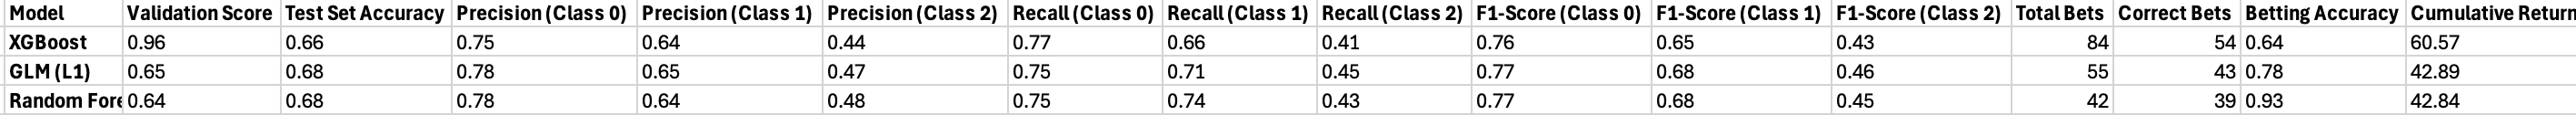

1. XGBoost achieved the highest validation score (0.96) during training, indicating strong performance on the training folds. However, its test accuracy dropped significantly to 0.66, suggesting overfitting. This overfitting likely occurred due to the complexity of the model, as XGBoost is prone to capturing noise in the training data.
In the betting strategy, XGBoost placed many bets (84) but had a relatively modest accuracy of 64%, resulting in inconsistent returns. Despite having the highest cumulative return among the models, this performance is unstable due to the large number of bets and the model's struggle with predicting draws (precision: 0.44).
2. The GLM performed consistently between the validation (0.65) and test set (0.68), indicating good generalization. The regularization (L1) helped prevent overfitting by shrinking irrelevant feature coefficients.
However, the GLM model struggled to identify draws (precision: 0.47), impacting its overall predictive capability. In the betting strategy, it placed fewer bets (55) but maintained higher accuracy (78%), showing that it was cautious and often correct in its predictions. Despite this, the returns were lower than XGBoost due to slightly fewer high-odds bets but profitability is better.
3. Random Forest performed consistently between validation (0.64) and test set (0.68), showing stability and robustness. It placed the fewest bets (42) but had the highest betting accuracy (93%), indicating its ability to make highly confident, accurate predictions. The Random Forest’s ensemble approach reduced variance, avoiding large errors and overfitting, which contributed to its reletively strong performance in the live betting strategy with being the only profitable model.

XGBoost performed the worst in this context due to overfitting and sensitivity to hyperparameters despite its high validation score (0.96). While XGBoost is highly effective at modeling complex non-linear relationships, its complexity can lead to memorizing training patterns rather than generalizing to unseen data—especially in dynamic, noisy datasets like live match statistics. The large number of estimators, deep trees, and aggressive learning rate contributed to overfitting, as evidenced by the significant drop in test accuracy (0.66) compared to the validation score. Additionally, XGBoost struggled with predicting the draw outcome (precision: 0.44), likely due to class imbalance in the data and the model's bias toward more frequent outcomes (home and away wins). Its large number of bets (84) also increased exposure to variance, amplifying the impact of incorrect predictions. In contrast, simpler models like GLM and Random Forest imposed better regularization and decision thresholds, leading to more consistent and profitable decisions.

# 5. CONCLUSIONS AND FUTURE WORK

In this project, we developed and evaluated a live betting strategy using three machine learning models: XGBoost, GLM with L1 Regularization, and Random Forest. Our aim was to combine our knowledge gained in lectures with a real-life challange. Our approach included  data preprocessing, feature normalization, and hyperparameter tuning. We practiced implementing the ML approaches we learnt in lectures. We assesed how good we can perform and imply the approaches were taught during the semester and also observed our flaws during the model building processes. 

To further improve the performance of our live betting strategy, we propose several extensions in three key areas:
training and testing the models, enhancing the dataset, and improving decision rules. These enhancements aim to make the models more efficient, precise, and capable of generalizing to unseen match scenarios and make profitable bettin decision.

1. Imporvements on trainin and testing the models
 
Efficient Hyperparameter Tuning:
Replace traditional grid search with Bayesian Optimization or Random Search to reduce computation time by exploring the parameter space more effectively.

Cross-Validation with Stratification:
Perform stratified K-fold cross-validation to ensure that each fold contains a balanced distribution of match outcomes (home win, draw, away win), reducing the risk of training bias.

Handling Class Imbalance:
Implement class weights in the loss function or use resampling techniques (e.g., SMOTE) to balance the dataset and improve the model’s ability to predict rare events like draws.

Alternative Models:
Experiment with models like:
CatBoost: Handles categorical variables efficiently and is robust to overfitting.
Neural Networks (LSTM/GRU): Sequential models can capture time-series dependencies, making them ideal for live event-based data.
Gradient Boosting with Early Stopping: Apply early stopping during training to prevent overfitting and identify the optimal number of boosting iterations.

2. Enhancing the Dataset
Expanding and refining the input data can significantly improve model performance by providing richer contextual information:

Player-Level Metrics:
Incorporate real-time player data such as:
Player ratings, passing accuracy, shots on target, and defensive actions.
Injury reports and substitution events to account for player impact on the game.
Along with starting 11 data

External Data Sources:
Fetch additional data from open sports APIs (e.g., SofaScore or Opta) to enrich the dataset with live performance indicators and historical trends

# 6. LINK TO OUR CODE

[CODE](https://github.com/fbaakyildiz/IE582TERMPROJECT/blob/main/WORK.ipynb)

# 7. REFERENCES
[1] Lu, C. J., Lee, T. S., Wang, C. C., & Chen, W. J. (2021). "Improving sports outcome prediction process using integrating adaptive weighted features and machine learning techniques". Entropy, 23(4), 477. [https://www.mdpi.com/1099-4300/23/4/477]

[2] Galekwa, R. M., Tshimula, J. M., Tajeuna, E. G., & Kyandoghere, K. (2024). A systematic review of machine learning in sports betting: Techniques, challenges, and future directions. arXiv preprint. [https://arxiv.org/abs/2410.21484]

